# Load Dataset

In [8]:
from google.colab import files
upload = files.upload()

Saving archive (2).zip to archive (2) (1).zip


In [9]:
import os
os.listdir()

['.config',
 'archive (2) (1).zip',
 'archive (2).zip',
 'extracted_files',
 'sample_data']

In [10]:
zip_filename = next(iter(upload))
zip_filename

'archive (2) (1).zip'

In [11]:
from google.colab import files
import zipfile
import os



# Step 2: Get the name of the uploaded file
zip_filename = next(iter(upload))

# Step 3: Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

# Step 4: List the extracted files
extracted_files = os.listdir('extracted_files')
print("Extracted files:", extracted_files)

Extracted files: ['Brownspot', 'Bacterialblight', 'Blast', 'Tungro']


# Imports

In [12]:
import pandas as pd
import numpy as np
from PIL import Image
import IPython.display as display
import matplotlib.pyplot as plt


In [13]:

os.listdir('/content/extracted_files')

['Brownspot', 'Bacterialblight', 'Blast', 'Tungro']

# Bacterial leaf blight

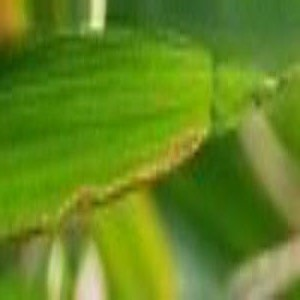

In [14]:
image =Image.open('/content/extracted_files/Bacterialblight/BACTERAILBLIGHT3_001.jpg')
display.display(image)


# Brown Spot

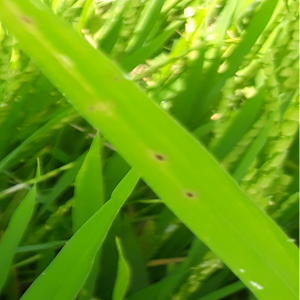

In [15]:
image = Image.open('/content/extracted_files/Brownspot/BROWNSPOT1_002.jpg')
display.display(image)

# Brownspot

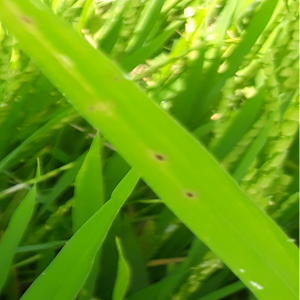

In [16]:
image = Image.open('/content/extracted_files/Brownspot/BROWNSPOT1_002.jpg')
display.display(image)

# Blast

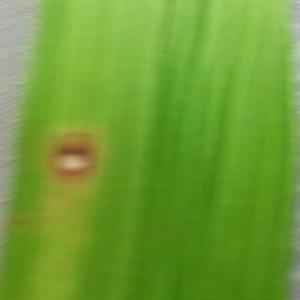

In [17]:
image =Image.open('/content/extracted_files/Blast/BLAST1_001.jpg')
display.display(image)

In [18]:

# Path to the dataset
dataset_path = '/content/extracted_files'


# List to store images and labels
images = []
labels = []

# Loop through each class folder
for class_name in os.listdir(dataset_path):
  class_path = os.path.join(dataset_path,class_name)
  if os.path.isdir(class_path):
    for image_name in os.listdir(class_path):
      image_path =os.path.join(class_path,image_name)
      try:
        with Image.open(image_path) as image:
          image = image.convert('RGB')
          image = image.resize((224,224))
          images.append(np.array(image))
          labels.append(class_name)
      except Exception as e:
        print(f'error loading {image_path} : {e}')


print("Dataset Loaded Successfully!")
print(f"Total Images: {len(images)}")
print(f"Total Labels: {len(labels)}")

Dataset Loaded Successfully!
Total Images: 5932
Total Labels: 5932


# Preprocessing

### 1-Label Encoding


In [19]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoder = le.fit_transform(labels)

class_mapping = dict(zip(le.classes_ , range(len(le.classes_))))
print("class mapping:" , class_mapping)

class mapping: {'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}


## 2-Normalize Image Data

In [20]:
images

[array([[[229, 231, 230],
         [236, 238, 237],
         [229, 231, 230],
         ...,
         [134, 170,  98],
         [161, 195, 129],
         [163, 194, 133]],
 
        [[230, 232, 231],
         [236, 238, 237],
         [228, 230, 229],
         ...,
         [133, 169,  97],
         [159, 193, 127],
         [160, 192, 128]],
 
        [[233, 235, 234],
         [234, 236, 235],
         [227, 229, 228],
         ...,
         [134, 170,  97],
         [156, 190, 122],
         [155, 187, 120]],
 
        ...,
 
        [[184, 185, 177],
         [180, 181, 173],
         [181, 182, 175],
         ...,
         [144, 144, 142],
         [145, 145, 143],
         [146, 146, 144]],
 
        [[182, 183, 174],
         [180, 181, 174],
         [183, 184, 178],
         ...,
         [144, 144, 142],
         [144, 144, 142],
         [146, 146, 144]],
 
        [[178, 179, 171],
         [180, 181, 174],
         [185, 186, 180],
         ...,
         [145, 145, 143],
  

In [21]:
images = np.array(images, dtype=np.float32) / 255.0
images

array([[[[0.8980392 , 0.90588236, 0.9019608 ],
         [0.9254902 , 0.93333334, 0.92941177],
         [0.8980392 , 0.90588236, 0.9019608 ],
         ...,
         [0.5254902 , 0.6666667 , 0.38431373],
         [0.6313726 , 0.7647059 , 0.5058824 ],
         [0.6392157 , 0.7607843 , 0.52156866]],

        [[0.9019608 , 0.9098039 , 0.90588236],
         [0.9254902 , 0.93333334, 0.92941177],
         [0.89411765, 0.9019608 , 0.8980392 ],
         ...,
         [0.52156866, 0.6627451 , 0.38039216],
         [0.62352943, 0.75686276, 0.49803922],
         [0.627451  , 0.7529412 , 0.5019608 ]],

        [[0.9137255 , 0.92156863, 0.91764706],
         [0.91764706, 0.9254902 , 0.92156863],
         [0.8901961 , 0.8980392 , 0.89411765],
         ...,
         [0.5254902 , 0.6666667 , 0.38039216],
         [0.6117647 , 0.74509805, 0.47843137],
         [0.60784316, 0.73333335, 0.47058824]],

        ...,

        [[0.72156864, 0.7254902 , 0.69411767],
         [0.7058824 , 0.70980394, 0.6784314 ]

# Split Data into Training ,testing and Validation

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(images,label_encoder,test_size=0.2,random_state=42,stratify=label_encoder)

X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,stratify=y_temp)

print(f"Training set: {X_train.shape[0]} images")
print(f"Validation set: {X_val.shape[0]} images")
print(f"Test set: {X_test.shape[0]} images")

Training set: 4745 images
Validation set: 593 images
Test set: 594 images


## 4-Data Augmentation

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [24]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_datagen = datagen.flow(X_train,y_train,batch_size=32)

# Build & Train CNN Model

### 1- Import Libraries

In [25]:


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

### 2- Build Model

In [26]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,3)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4,activation='softmax'))


model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 56576)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,241,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,343,620 (28.01 MB)

 Trainable params: 7,343,620 (28.01 MB)

 Non-trainable params: 0 (0.00 B)

### 3- Compile The Model

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### 4- Train The Model

In [28]:
history = model.fit(train_datagen,batch_size=32,epochs=10,validation_data=(X_val,y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 550s 4s/step - accuracy: 0.2982 - loss: 1.3832 - val_accuracy: 0.5464 - val_loss: 1.1159
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.4602 - loss: 1.1843 - val_accuracy: 0.6189 - val_loss: 0.9395
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 532s 4s/step - accuracy: 0.5239 - loss: 1.0938 - val_accuracy: 0.6931 - val_loss: 0.8519
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 533s 4s/step - accuracy: 0.5894 - loss: 0.9794 - val_accuracy: 0.7774 - val_loss: 0.7575
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.6262 - loss: 0.9257 - val_accuracy: 0.7572 - val_loss: 0.7076
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.6694 - loss: 0.8797 - val_accuracy: 0.7825 - val_loss: 0.6325
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 537s 4s/step - accuracy: 0.7033 - loss: 0.8038 - val_accuracy: 0.8263 - val_loss: 0.5336
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 539s 4s/step - accuracy: 0.7443 - loss: 0.7231 - val_accu

In [29]:
# Model is not training well or generilized
# Model is going to overfitting
# training accuracy is low but validiation accuracy is high
# validation loss in decreasing very low


# Handle Over Fitting

#### 1- Add More  Data Augmentation

In [30]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)
train_datagen = datagen.flow(X_train,y_train,batch_size=32)


#### 2-Use Early Stopping (Stop Before Overfitting)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

## Again Train The Model

In [32]:
history = model.fit(train_datagen,epochs=10,validation_data=(X_val,y_val),callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 535s 4s/step - accuracy: 0.7875 - loss: 0.5904 - val_accuracy: 0.8668 - val_loss: 0.3815
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 538s 4s/step - accuracy: 0.7949 - loss: 0.5742 - val_accuracy: 0.8803 - val_loss: 0.3451
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 536s 4s/step - accuracy: 0.8136 - loss: 0.5079 - val_accuracy: 0.8870 - val_loss: 0.3104
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 539s 4s/step - accuracy: 0.8327 - loss: 0.4812 - val_accuracy: 0.8988 - val_loss: 0.3121
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 535s 4s/step - accuracy: 0.8455 - loss: 0.4552 - val_accuracy: 0.8988 - val_loss: 0.2947
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 563s 4s/step - accuracy: 0.8329 - loss: 0.4808 - val_accuracy: 0.9241 - val_loss: 0.2579
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 533s 4s/step - accuracy: 0.8502 - loss: 0.4305 - val_accuracy: 0.9123 - val_loss: 0.2623
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 536s 4s/step - accuracy: 0.8648 - loss: 0.3999 - val_accu

### Evaluate Model

In [34]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

19/19 ━━━━━━━━━━━━━━━━━━━━ 17s 919ms/step - accuracy: 0.9246 - loss: 0.2387
Test Accuracy: 92.42%


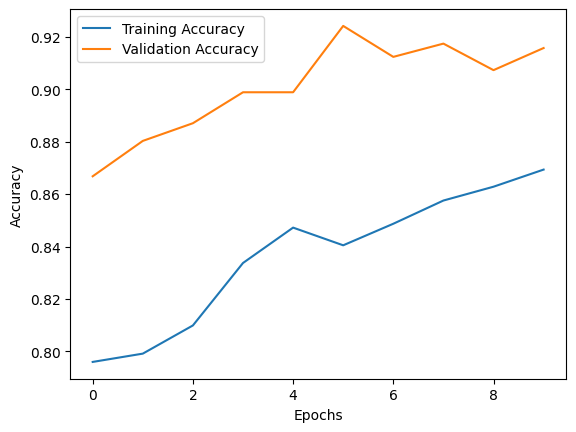

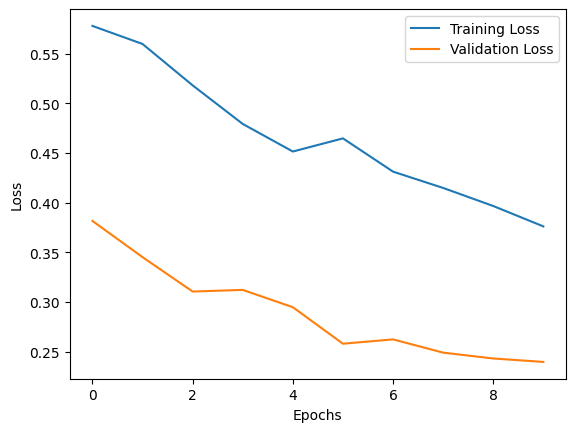

In [35]:

import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Save Model

In [36]:
model.save('rice_leaf_model.h5')


In [38]:
model.save('rice_leaf_weights.h5')